#MACHINE LEARNING.K-MEANS

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Utilizamos la biblioteca sklearn para importarnos un generador de grupos

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

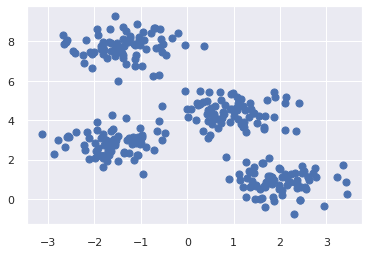

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50)

Importamos el algoritmo que identica los grupos.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

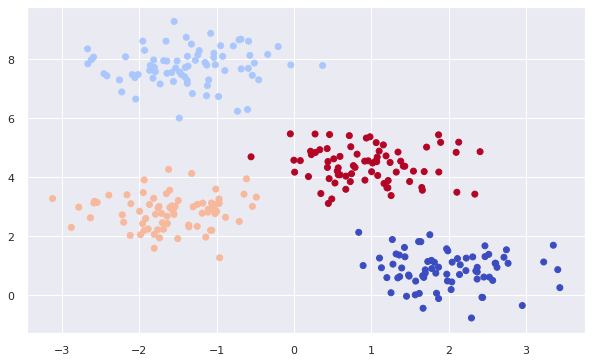

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,  cmap='coolwarm')

Importamos una función que nos permite estimar la distancia mínima de un punto con respecto a un conjunto de puntos.

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

In [ ]:
def find_clusters(X, n_clusters, rseed=2):
        rng = np.random.RandomState(rseed)
        i = rng.permutation(X.shape[0])[:n_clusters]
        centers = X[i]

        while True:
            labels = pairwise_distances_argmin(X, centers)

            new_centers = np.array([X[labels == i].mean(0)for i in range(n_clusters)])

            if np.all(centers == new_centers):
                break
            centers = new_centers

        return centers, labels


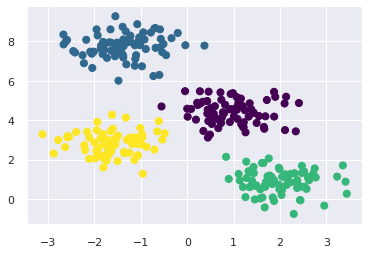

In [ ]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

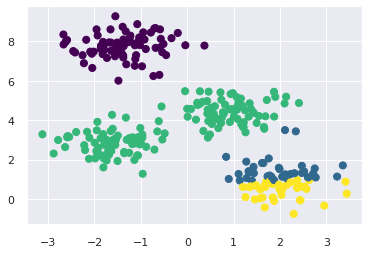

In [ ]:
centers, labels = find_clusters(X, 4,rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')


##Aplicamos el cluster a las divisas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/tr_eikon_eod_data.csv'
raw = pd.read_csv(filename,index_col=0, parse_dates=True)
symbol = 'EUR='
data = pd.DataFrame(raw[symbol])
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data

,EUR=,returns
Date,,
2010-01-04,1.4411,0.006125
2010-01-05,1.4368,-0.002988
2010-01-06,1.4412,0.003058
2010-01-07,1.4318,-0.006544
2010-01-08,1.4412,0.006544
...,...,...
2018-06-25,1.1702,0.004024
2018-06-26,1.1645,-0.004883
2018-06-27,1.1552,-0.008018


In [ ]:
lags = 2
lag=0
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [ ]:
create_lags(data)
data.head()

,EUR=,returns,lag_1,lag_2
Date,,,,
2010-01-04,1.4411,0.006125,NaN,NaN
2010-01-05,1.4368,-0.002988,0.006125,NaN
2010-01-06,1.4412,0.003058,-0.002988,0.006125
2010-01-07,1.4318,-0.006544,0.003058,-0.002988
2010-01-08,1.4412,0.006544,-0.006544,0.003058


In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(data[cols])
data['pos_clus'] = model.predict(data[cols])
data

,EUR=,returns,lag_1,lag_2,pos_clus
Date,,,,,
2010-01-06,1.4412,0.003058,-0.002988,0.006125,1
2010-01-07,1.4318,-0.006544,0.003058,-0.002988,0
2010-01-08,1.4412,0.006544,-0.006544,0.003058,1
2010-01-11,1.4513,0.006984,0.006544,-0.006544,0
2010-01-12,1.4494,-0.001310,0.006984,0.006544,0
...,...,...,...,...,...
2018-06-25,1.1702,0.004024,0.004644,0.002676,0
2018-06-26,1.1645,-0.004883,0.004024,0.004644,1
2018-06-27,1.1552,-0.008018,-0.004883,0.004024,1


In [ ]:
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)
data

,EUR=,returns,lag_1,lag_2,pos_clus
Date,,,,,
2010-01-06,1.4412,0.003058,-0.002988,0.006125,-1
2010-01-07,1.4318,-0.006544,0.003058,-0.002988,1
2010-01-08,1.4412,0.006544,-0.006544,0.003058,-1
2010-01-11,1.4513,0.006984,0.006544,-0.006544,1
2010-01-12,1.4494,-0.001310,0.006984,0.006544,1
...,...,...,...,...,...
2018-06-25,1.1702,0.004024,0.004644,0.002676,1
2018-06-26,1.1645,-0.004883,0.004024,0.004644,-1
2018-06-27,1.1552,-0.008018,-0.004883,0.004024,-1


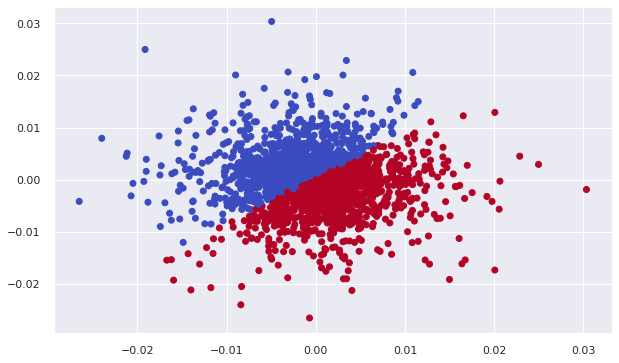

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1], c=data['pos_clus'], cmap='coolwarm')

In [ ]:
data['strat_clus'] = data['pos_clus'] * data['returns']

In [ ]:
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       0.813126
strat_clus    0.857084
dtype: float64

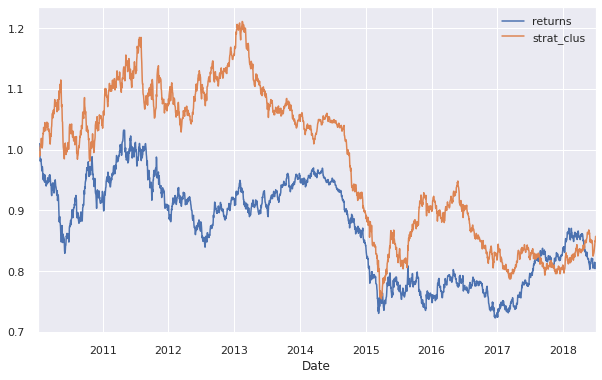

In [ ]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6))

#ANÁLISIS DE FRECUENCIA

Creamos una función para convertir las rentabilidades de los dos últimos días en términos binarios.

Definimos que las variables cols_bin que vamos a crear son gobales es decir accesible desde cualquier parte del programa.

Defino la variable bins=[0] para determinar el criterio que seguiremos para convertir las rentabilidades pasadas en un variable binaria. Si la rentabilidad es menor que 0 poner 0 y en caso contrario por un 1.

np.digitize(data[col], bins=bins)



In [ ]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)


Creamos una variable (columna) que toma valores 1 cuando la rentabilidad es positiva y -1 cuando
es negativa

In [ ]:
data['direction'] =np.sign(data['returns']).astype(int)

In [ ]:
create_bins(data)
data[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
Date,,,
2010-01-06,0,1,1
2010-01-07,1,0,-1
2010-01-08,0,1,1
2010-01-11,1,0,1
2010-01-12,1,1,-1


Selecccionamos las columnas con las que vamos a trabajar

In [ ]:
grouped = data.groupby(cols_bin + ['direction'])

size() es una función de numpy que analiza cuantas veces se repite una determinada secuencia de datos

In [ ]:
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           237
                       0             4
                       1           276
           1          -1           280
                       0             1
                       1           295
1          0          -1           287
                       0             1
                       1           288
           1          -1           288
                       0             5
                       1           251
dtype: int64

Vamos a guardar la combinación en dataframe res. Para cada uno de los posibles valores de la dirección estimaremos la frecuencia del comportamiento de los retardos.
unstack(fill_value=0) nos permite convertir en cero los posibles nan

In [ ]:
res = grouped['direction'].size().unstack(fill_value=0)
res

direction             -1   0    1
lag_1_bin lag_2_bin              
0         0          237   4  276
          1          280   1  295
1         0          287   1  288
          1          288   5  251

Analizamos la frecuencias y elegimos la siguiente estrategia,
cuando el precio sube dos veces consecutivas luego baja. Por
tanto, la aplicamos y vemos que pasa.

Es decir cuando el precio suba dos veces consecutivas tomamos una posición corta.

Para ello sumamos las columnas de los retardos data[cols_bin].sum(axis=1), para poder imponer una estrategia de actuación. Cuando la suma sea igual a 2 tomar una posición corta.

In [ ]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)

Veamos cuantas veces acertamos, es decir, contamos las veces que el valor estimado coincide con el real.

In [ ]:
(data['direction'] == data['pos_freq']).value_counts()

True     1147
False    1066
dtype: int64

Calculamos el resultado de la estrategia y lo comparamos con la estrategia de no hacer nada.

In [ ]:
data['strat_freq'] = data['pos_freq'] * data['returns']
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       0.813126
strat_freq    1.016673
dtype: float64

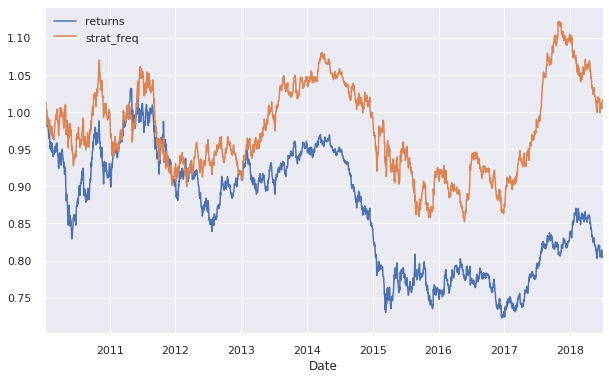

In [ ]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10, 6))